In [ ]:
# Step 0: Install and Import Libraries
!pip install nltk spacy --quiet
!python -m spacy download en_core_web_sm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # Add this line to download the missing resource

import re
import string
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from spacy import displacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /content/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [16]:
#sample paragraph
text = """
In 2025, Taylor Swift won the Grammy for Album of the Year for the fourth time, setting a new record in music history.
The award ceremony was held in Los Angeles, where she gave a powerful speech about female empowerment and creative freedom.
"""



In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_text = clean_text(text)
print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
 in taylor swift won the grammy for album of the year for the fourth time setting a new record in music history the award ceremony was held in los angeles where she gave a powerful speech about female empowerment and creative freedom


In [18]:
sentences = sent_tokenize(cleaned_text)
words = word_tokenize(cleaned_text)

print("\nTokenized Sentences:\n", sentences)
print("\nTokenized Words:\n", words)



Tokenized Sentences:
 ['in taylor swift won the grammy for album of the year for the fourth time setting a new record in music history the award ceremony was held in los angeles where she gave a powerful speech about female empowerment and creative freedom']

Tokenized Words:
 ['in', 'taylor', 'swift', 'won', 'the', 'grammy', 'for', 'album', 'of', 'the', 'year', 'for', 'the', 'fourth', 'time', 'setting', 'a', 'new', 'record', 'in', 'music', 'history', 'the', 'award', 'ceremony', 'was', 'held', 'in', 'los', 'angeles', 'where', 'she', 'gave', 'a', 'powerful', 'speech', 'about', 'female', 'empowerment', 'and', 'creative', 'freedom']


In [19]:
stop_words = set(stopwords.words('english'))

words_filtered = [w for w in words if w not in stop_words]

print("\nAfter Stopword Removal:\n", words_filtered)
print(f"\nWord count before: {len(words)} | After: {len(words_filtered)}")
print(f"Unique words before: {len(set(words))} | After: {len(set(words_filtered))}")



After Stopword Removal:
 ['taylor', 'swift', 'grammy', 'album', 'year', 'fourth', 'time', 'setting', 'new', 'record', 'music', 'history', 'award', 'ceremony', 'held', 'los', 'angeles', 'gave', 'powerful', 'speech', 'female', 'empowerment', 'creative', 'freedom']

Word count before: 42 | After: 24
Unique words before: 35 | After: 24


In [20]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sample_words = words_filtered[:10]

print("\nOriginal | Stemmed | Lemmatized")
print("----------------------------------")
for word in sample_words:
    print(f"{word:<10} | {stemmer.stem(word):<10} | {lemmatizer.lemmatize(word)}")



Original | Stemmed | Lemmatized
----------------------------------
taylor     | taylor     | taylor
swift      | swift      | swift
grammy     | grammi     | grammy
album      | album      | album
year       | year       | year
fourth     | fourth     | fourth
time       | time       | time
setting    | set        | setting
new        | new        | new
record     | record     | record



POS Tag Counts:
 Counter({'NN': 13, 'JJ': 7, 'VBD': 2, 'VBG': 1, 'NNS': 1})


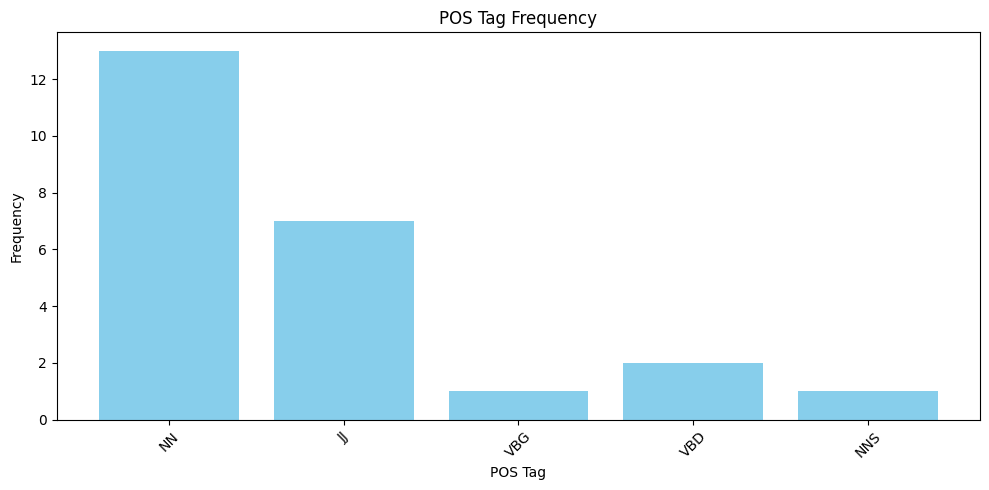

In [21]:
# Add the download directory to NLTK's data path
nltk.data.path.append('/content/nltk_data')

pos_tags = nltk.pos_tag(words_filtered)

# Count POS Tags
tag_counts = Counter(tag for word, tag in pos_tags)

# Display counts
print("\nPOS Tag Counts:\n", tag_counts)

# Bar Plot
plt.figure(figsize=(10, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title("POS Tag Frequency")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

print("\nNamed Entities and Labels:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")

# Visual NER
displacy.render(doc, style="ent", jupyter=True)



Named Entities and Labels:
2025 → DATE
Taylor Swift → PERSON
Grammy → PERSON
fourth → ORDINAL
Los Angeles → GPE
